In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.optimize import curve_fit

script_directory = Path.cwd() 
TitanicDataset = script_directory / 'Titanic-Dataset.csv'
df = pd.read_csv(TitanicDataset)

In [10]:
#Survival rate by Pclass
pclass3_survived_rate = df[(df['Pclass'] == 3)]['Survived'].mean()
pclass2_survived_rate = df[(df['Pclass'] == 2)]['Survived'].mean()
pclass1_survived_rate = df[(df['Pclass'] == 1)]['Survived'].mean()

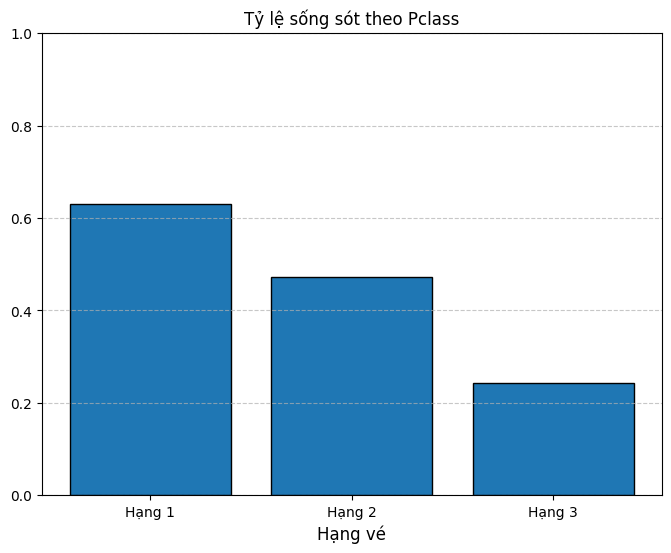

In [11]:
pclasses = ['Hạng 1', 'Hạng 2', 'Hạng 3']
p_survival_rates = [pclass1_survived_rate, pclass2_survived_rate, pclass3_survived_rate]

plt.figure(figsize=(8, 6))
bars = plt.bar(pclasses, p_survival_rates, edgecolor='black')

plt.title('Tỷ lệ sống sót theo Pclass')
plt.xlabel('Hạng vé', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [12]:
#Survival rate by Sex
male_survived_rate = df[(df['Sex'] == 'male')]['Survived'].mean()
female_survived_rate = df[(df['Sex'] == 'female')]['Survived'].mean()

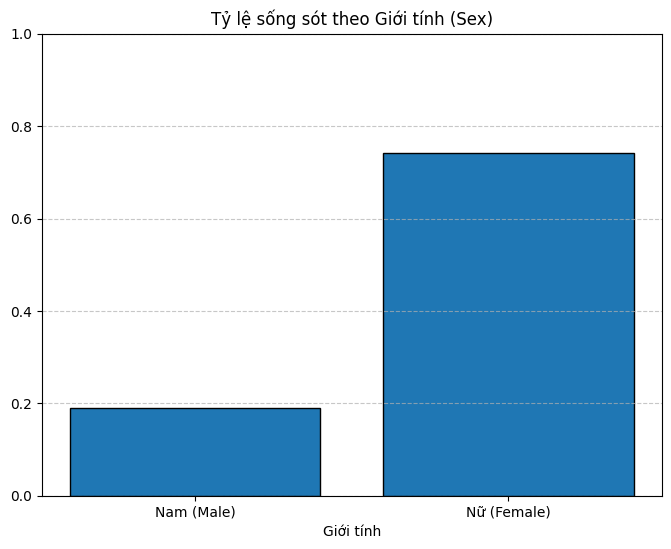

In [13]:
sex_labels = ['Nam (Male)', 'Nữ (Female)']
s_survival_rates = [male_survived_rate, female_survived_rate]

plt.figure(figsize=(8, 6))
bars = plt.bar(sex_labels, s_survival_rates, edgecolor='black')

plt.title('Tỷ lệ sống sót theo Giới tính (Sex)')
plt.xlabel('Giới tính')
plt.ylim(0, 1) # Giới hạn trục Y từ 0 đến 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị đồ thị
plt.show()

In [14]:
#Survival rate by Age
age_group_count = {}
survival_rates = {}
for i in range(0, 85, 5):
    #Phân cụm tuổi
    group_data = df[(df['Age'] >= i) & (df['Age'] < i+5)]
    counts = len(group_data)

    if counts > 0:
        rate = group_data['Survived'].mean()
    else:
        rate = 0

    group_name = f"group_{i}_{i+5}"
    age_count = f"age_{i}_{i+5}"

    survival_rates[group_name] = rate
    age_group_count[age_count] = counts

#Dữ liệu thực tế
sr_array = np.array(list(survival_rates.values()))
count_array = np.array(list(age_group_count.values()))
age_array = np.arange(2.5, 85, 5)

#Neo kiến thức (dữ liệu giả lập)
fake_sr_array = np.array([0.2, 0.17, 0.12, 0.04])
fake_count_array = np.array([300, 300, 300, 1000])
fake_age_array = np.array([85, 90, 95, 100])

#Dữ liệu tổng hợp
sr_array_final = np.concatenate([sr_array, fake_sr_array])
count_array_final = np.concatenate([count_array, fake_count_array])
age_array_final = np.concatenate([age_array, fake_age_array])

#Chặn 2 đầu tỉ lệ sống
sr_array_final = np.clip(sr_array_final, 0, 1)

safe_counts = np.where(count_array_final > 0, count_array_final, 1)
#Tính trọng số
weights_age = 1 / np.sqrt(safe_counts)

#Hàm bậc 7
def model(x, p7, p6, p5, p4, p3, p2, p1, p0):
    return p7*x**7 + p6*x**6 + p5*x**5 + p4*x**4 + p3*x**3 + p2*x**2 + p1*x + p0

#Curve_fit
age_values, _ = curve_fit(model, age_array_final, sr_array_final,
                      sigma = weights_age,
                      absolute_sigma=True, 
                      maxfev=20000)
p7, p6, p5, p4, p3, p2, p1, p0 = age_values

equation = (f"f(x) = {p7:.2e}*x^7 + {p6:.2e}*x^6 + {p5:.2e}*x^5 + "
            f"{p4:.2e}*x^4 + {p3:.2e}*x^3 + {p2:.4f}*x^2 + "
            f"{p1:.4f}*x + {p0:.4f}")
print(equation)


f(x) = 1.15e-12*x^7 + -4.52e-10*x^6 + 6.83e-08*x^5 + -4.94e-06*x^4 + 1.66e-04*x^3 + -0.0018*x^2 + -0.0189*x + 0.7243


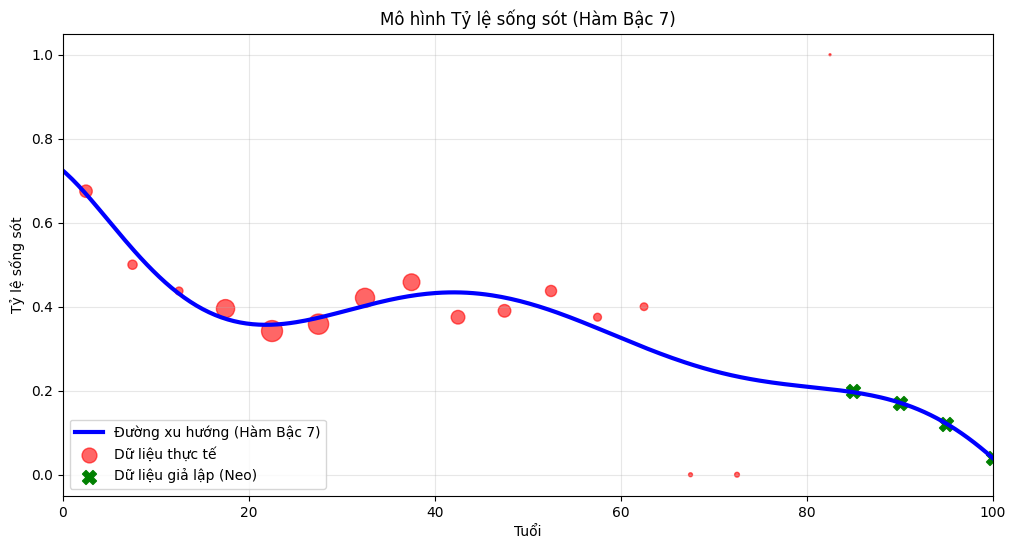

In [15]:
#Vẽ đồ thị
plt.figure(figsize=(12, 6))

x_line = np.linspace(0, 100, 300) 
y_line = model(x_line, *age_values)
# Kẹp giá trị trong khoảng [0, 1]
y_line = np.clip(y_line, 0, 1)
plt.plot(x_line, y_line, color='blue', linewidth=3, label='Đường xu hướng (Hàm Bậc 7)')

plt.scatter(age_array, sr_array, s=count_array*2, color='red', alpha=0.6, label='Dữ liệu thực tế')
mask_fake = fake_age_array <= 100
plt.scatter(fake_age_array[mask_fake], fake_sr_array[mask_fake], 
            s=100, color='green', marker='X', label='Dữ liệu giả lập (Neo)')

plt.title('Mô hình Tỷ lệ sống sót (Hàm Bậc 7)', fontsize=12)
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ sống sót')
plt.xlim(0, 100)
plt.ylim(-0.05, 1.05)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
#Survial rate by SibSp

no0_SibSp_df = df[df['SibSp'] >= 1].copy()

full_SibSp_count_dict = {}
full_sr_SibSp_dict = {}

for i in range(0, 4, 1):
    full_SibSp_data = df[(df['SibSp'] == i)]
    full_counts = len(full_SibSp_data)

    full_rate = full_SibSp_data['Survived'].mean()

    full_SibSp_sr = f"SibSp_{i}"
    full_SibSp_count = f"SibSp_{i}_count"

    full_sr_SibSp_dict[full_SibSp_sr] = full_rate
    full_SibSp_count_dict[full_SibSp_count] = full_counts

full_SibSp_sr_array = np.array(list(full_sr_SibSp_dict.values()))
full_SibSp_count_array = np.array(list(full_SibSp_count_dict.values()))
full_SibSp_number_array = np.array([0,1,2,3])


SibSp_count_dict = {}
sr_SibSp_dict = {}

for i in range(1, 4, 1):
    SibSp_data = df[(df['SibSp'] == i)]
    counts = len(SibSp_data)

    rate = SibSp_data['Survived'].mean()

    SibSp_sr = f"SibSp_{i}"
    SibSp_count = f"SibSp_{i}_count"

    sr_SibSp_dict[SibSp_sr] = rate
    SibSp_count_dict[SibSp_count] = counts

SibSp_sr_array = np.array(list(sr_SibSp_dict.values()))
SibSp_count_array = np.array(list(SibSp_count_dict.values()))
SibSp_number_array = np.array([1,2,3])

def decay_model(x, A, k):
    return A * np.exp(-k * (x - 1))

weights = np.sqrt(SibSp_count_array)

values_SibSp, _ = curve_fit(decay_model, SibSp_number_array, SibSp_sr_array, 
                          p0=[0.55, 0.5], 
                          sigma=1/weights, 
                          absolute_sigma=True)
A_best, k_best = values_SibSp

print(f"f(x) = {A_best} * exp(-{k_best} * (x - 1))")

f(x) = 0.5386479096057762 * exp(-0.27262271474896277 * (x - 1))


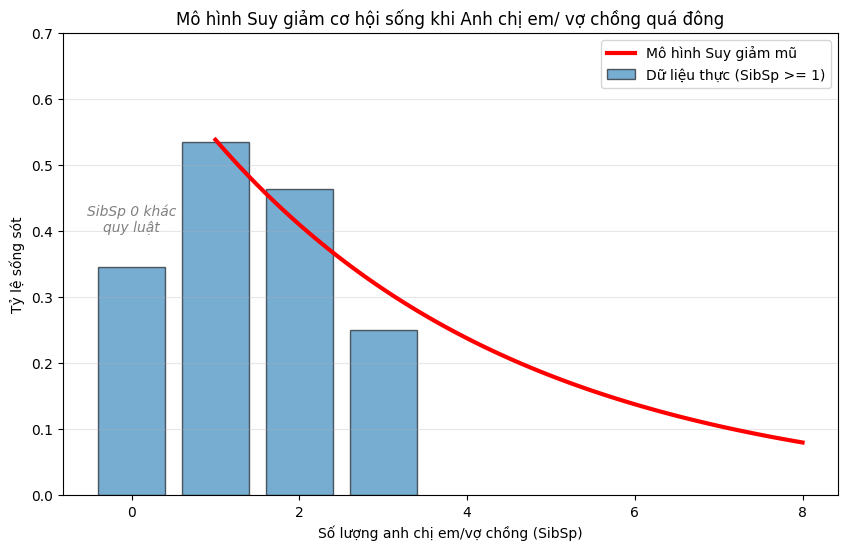

In [17]:
plt.figure(figsize=(10, 6))
# Vẽ dữ liệu thực tế (Cột)
plt.bar(full_SibSp_number_array, full_SibSp_sr_array, alpha=0.6, label='Dữ liệu thực (SibSp >= 1)', edgecolor='black')
# Vẽ đường dự báo (Đường cong)
x_line = np.linspace(1, 8, 100) # Chạy từ 1 đến 8
y_line = decay_model(x_line, *values_SibSp)
plt.plot(x_line, y_line, color='red', linewidth=3, label='Mô hình Suy giảm mũ')
plt.title('Mô hình Suy giảm cơ hội sống khi Anh chị em/ vợ chồng quá đông')
plt.xlabel('Số lượng anh chị em/vợ chồng (SibSp)')
plt.ylabel('Tỷ lệ sống sót')
plt.ylim(0, 0.7)
plt.legend()
plt.grid(axis='y', alpha=0.3)    
# Thêm chú thích cho SibSp 0
plt.text(0, 0.4, "SibSp 0 khác\nquy luật", 
            color='gray', style='italic', ha='center')

plt.show()

In [ ]:
#Survival rate by Parch

Parch_count_dict = {}
sr_Parch_dict = {}

#print(df['Parch'].max()) -> 6

for i in range(0, 7, 1):
    Parch_data = df[(df['Parch'] == i)]
    counts = len(Parch_data)

    rate = Parch_data['Survived'].mean()

    Parch_sr = f"Parch_{i}"
    Parch_count = f"Parch_{i}_count"

    sr_Parch_dict[Parch_sr] = rate
    Parch_count_dict[Parch_count] = counts

def gaussian_func(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

Parch_sr_array = np.array(list(sr_Parch_dict.values()))
Parch_count_array = np.array(list(Parch_count_dict.values()))
Parch_number_array = np.array([0,1,2,3,4,5,6])

values_parch, _ = curve_fit(gaussian_func, Parch_number_array, Parch_sr_array,
                             p0=[0.6, 1.5, 1.0])
a_opt, mu_opt, sigma_opt = values_parch

print(f"f(x) = {a_opt} * exp(-(x - {mu_opt})^2 / (2 * {sigma_opt}^2))")

f(x) = 0.595450475019784 * exp(-(x - 1.7061992551063792)^2 / (2 * 1.5805447467220233^2))


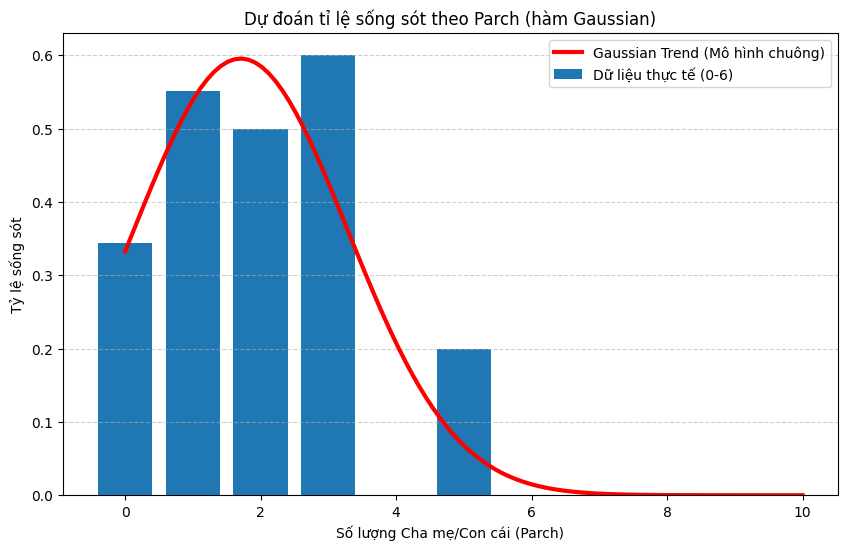

In [19]:
parch_labels = list(range(0, 7))

x_smooth = np.linspace(0, 10, 100)
y_smooth = gaussian_func(x_smooth, *values_parch)

plt.figure(figsize=(10, 6))
plt.bar(Parch_number_array, Parch_sr_array, label='Dữ liệu thực tế (0-6)')
plt.plot(x_smooth, y_smooth, color='red', linewidth=3, label='Gaussian Trend (Mô hình chuông)')

plt.xlabel('Số lượng Cha mẹ/Con cái (Parch)')
plt.ylabel('Tỷ lệ sống sót')
plt.title('Dự đoán tỉ lệ sống sót theo Parch (hàm Gaussian)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [20]:
#Survival rate by Ticket
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')
#              Ticket  Ticket_Frequency
# 0         A/5 21171                 1  <-- Đi 1 mình (Vé A/5 21171 xuất hiện 1 lần)
# 1          PC 17599                 1
# 2  STON/O2. 3101282                 1
# 3            113803                 2  <-- Đi 2 người (Vé 113803 xuất hiện 2 lần)
# 4            373450                 1
# 5            330877                 1
# 6             17463                 1
# 7            349909                 4  <-- Đi 4 người (Vé 349909 xuất hiện 4 lần)
# 8            347742                 3
# 9            237736                 2
# print(max(df["Ticket_Frequency"])) <-- 7

ticket_freq_rates = {}
ticket_freq_counts = {}

max_freq = int(df['Ticket_Frequency'].max())

for i in range(1, max_freq + 1):
    group_data = df[df['Ticket_Frequency'] == i]
    if len(group_data) > 0:
        ticket_freq_rates[i] = group_data['Survived'].mean()
        ticket_freq_counts[i] = len(group_data)

x_ticket = np.array(list(ticket_freq_rates.keys()))
y_ticket = np.array(list(ticket_freq_rates.values()))
counts_ticket = np.array(list(ticket_freq_counts.values()))

def gaussian_model(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

weights_ticket = 1 / np.sqrt(counts_ticket)

values_ticket, _ = curve_fit(gaussian_model, x_ticket, y_ticket, 
                    p0=[0.6, 2.5, 1.5], 
                    sigma=weights_ticket)
a_opt, mu_opt, sigma_opt = values_ticket

print(f"f(x) = {a_opt:.4f} * exp(-(x - {mu_opt:.4f})^2 / (2 * {sigma_opt:.4f}^2))")

f(x) = 0.6931 * exp(-(x - 2.8004)^2 / (2 * 1.3772^2))


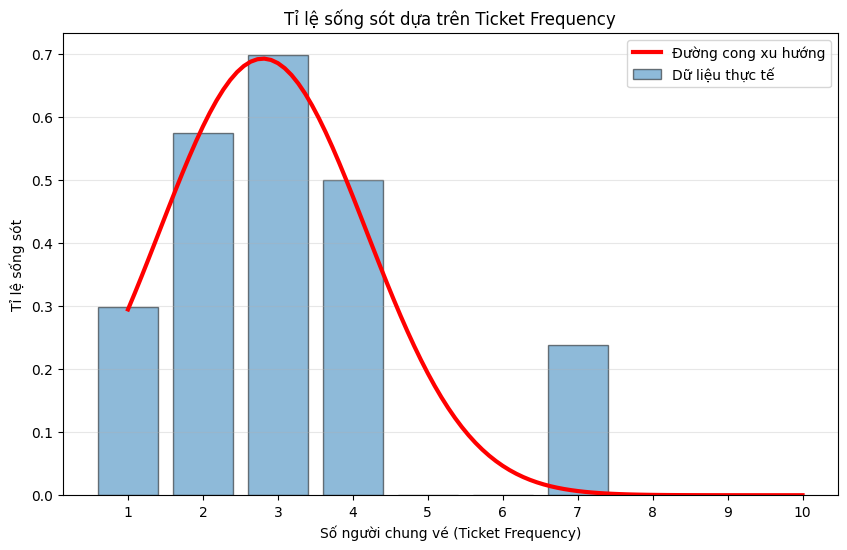

In [21]:
x_smooth = np.linspace(1, 10, 100)
y_smooth = gaussian_model(x_smooth, *values_ticket)

plt.figure(figsize=(10, 6))
plt.bar(x_ticket, y_ticket, alpha=0.5, label='Dữ liệu thực tế', edgecolor='black')
plt.plot(x_smooth, y_smooth, color='red', linewidth=3, label='Đường cong xu hướng')

plt.title('Tỉ lệ sống sót dựa trên Ticket Frequency')
plt.xlabel('Số người chung vé (Ticket Frequency)')
plt.ylabel('Tỉ lệ sống sót')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [22]:
#Survival rate by Fare

fare_group_count = {}
fare_survival_rates = {}

# Phân cụm
max_fare = int(df['Fare'].max())
for i in range(0, max_fare, 20):
    group_data = df[(df['Fare'] >= i) & (df['Fare'] < i+20)]
    counts = len(group_data)

    if counts > 0:
        rate = group_data['Survived'].mean()
    else:
        rate = 0

    group_name = f"fare_group_{i}_{i+20}"
    count_name = f"fare_count_{i}_{i+20}"

    fare_survival_rates[group_name] = rate
    fare_group_count[count_name] = counts

sr_fare_final = np.array(list(fare_survival_rates.values()))
count_fare_final = np.array(list(fare_group_count.values()))

fare_array_final = np.arange(10, max_fare, 20) # Lấy trung điểm của mỗi cụm

sr_fare_final = np.clip(sr_fare_final, 0, 1) # Chặn tỉ lệ sống trong khoảng [0, 1]

safe_counts = np.where(count_fare_final > 0, count_fare_final, 1)
weights_fare = 1 / np.sqrt(safe_counts)

#Hàm bão hòa
def saturation_model(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

values_fare, _ = curve_fit(saturation_model, fare_array_final, sr_fare_final,
                           sigma = weights_fare,
                           absolute_sigma=True, 
                           maxfev=20000,
                           p0=[0.8, 0.05, 40])

L_f, k_f, x0_f = values_fare

print(f"f(x) = {L_f} / (1 + exp(-{k_f} * (x - {x0_f})))")

f(x) = 0.6352613406229856 / (1 + exp(-0.05135808869608263 * (x - 15.025372178202028)))


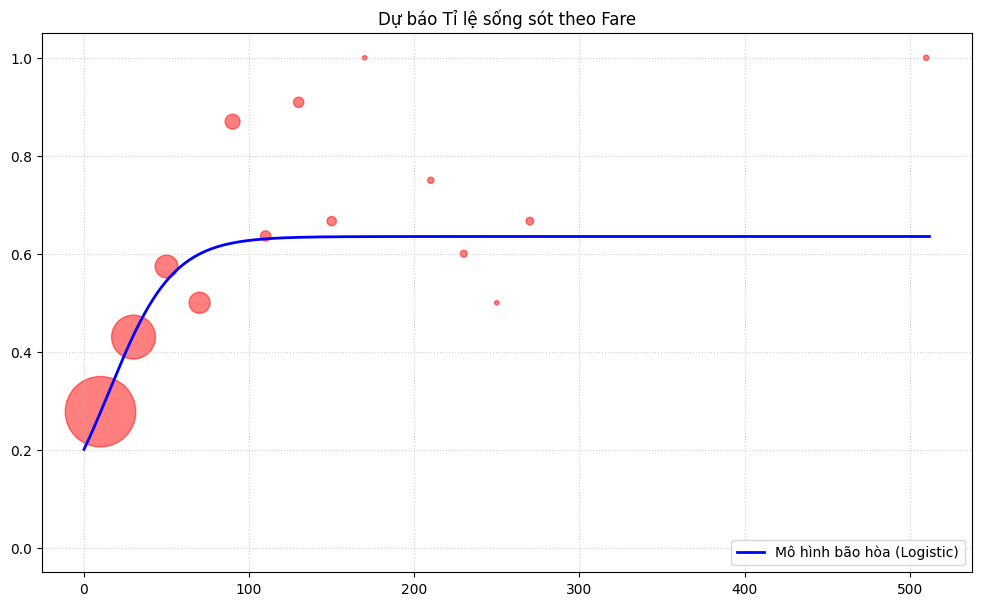

In [23]:
plt.figure(figsize=(12, 7))

sizes = count_fare_final * 5 
plt.scatter(fare_array_final, sr_fare_final, s=sizes, color='red', alpha=0.5)

max_fare_plot = int(df['Fare'].max())
x_model = np.linspace(0, max_fare_plot, 500)
y_model = saturation_model(x_model, L_f, k_f, x0_f)
plt.plot(x_model, y_model, color='blue', linewidth=2, label='Mô hình bão hòa (Logistic)')

plt.title('Dự báo Tỉ lệ sống sót theo Fare')

plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(-0.05, 1.05) # Giữ khung nhìn tỉ lệ từ 0 đến 1
plt.show()

In [24]:
#Survival rate by Embarked
e_S_survived_rate = df[(df['Embarked'] == 'S')]['Survived'].mean()
e_C_survived_rate = df[(df['Embarked'] == 'C')]['Survived'].mean()
e_Q_survived_rate = df[(df['Embarked'] == 'Q')]['Survived'].mean()

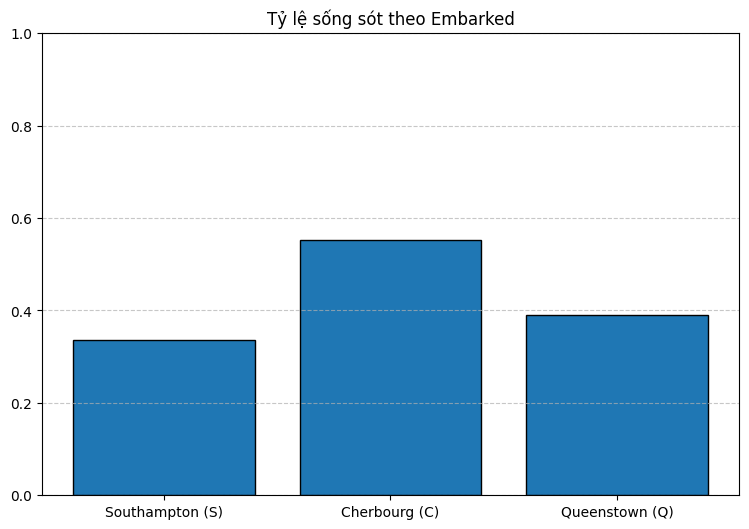

In [25]:
embarked_labels = ['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)']
survival_rates = [e_S_survived_rate, e_C_survived_rate, e_Q_survived_rate]

plt.figure(figsize=(9, 6))
bars = plt.bar(embarked_labels, survival_rates, edgecolor='black')

plt.title('Tỷ lệ sống sót theo Embarked')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Tạo các hàm tính tỉ lệ sống sót từng cột

In [26]:
age_values = np.array(age_values)
values_SibSp = np.array(values_SibSp)
values_parch = np.array(values_parch)
values_ticket = np.array(values_ticket)
values_fare = np.array(values_fare)

values_pclass = np.array([pclass1_survived_rate, pclass2_survived_rate, pclass3_survived_rate])
values_sex = np.array([male_survived_rate, female_survived_rate])
values_embarked = np.array([e_S_survived_rate, e_C_survived_rate, e_Q_survived_rate])


#Các cột theo phương trình
def predict_survival_age(age, p):
    #p: Mảng các hệ số [p7, p6, ..., p0] thu được từ curve_fit
    sr = np.polyval(p, age) # np.polyval tính toán: p[0]*x^n + p[1]*x^(n-1) + ... + p[n]

    return np.clip(sr, 0, 1)

def predict_survival_sibsp(sibsp, v):
    if sibsp == 0:
        return 0.345
    # v = [A, k]
    sr = v[0] * np.exp(-v[1] * (sibsp - 1))
    return np.clip(sr, 0, 1)

def predict_survival_parch(parch, v):
    # v = [a, mu, sigma]
    sr = v[0] * np.exp(-(parch - v[1])**2 / (2 * v[2]**2))

    return np.clip(sr, 0, 1)

def predict_survival_ticket_freq(freq, v):
    # v = [a, mu, sigma]
    sr = v[0] * np.exp(-(freq - v[1])**2 / (2 * v[2]**2))
    return np.clip(sr, 0, 1)

def predict_survival_fare(fare, v):
    # v = [L, k, x0]
    res = v[0] / (1 + np.exp(-v[1] * (fare - v[2])))
    return np.clip(res, 0, 1)

#Các cột theo hằng số
def predict_survival_pclass(pclass, rate):
    idx = int(pclass) - 1  #Chuyển 1,2,3 thành index 0,1,2
    return rate[idx]

def predict_survival_sex(sex, rate):
    if sex.lower() == 'female': 
        idx = 1
    else:
        idx = 0
    return rate[idx]

def predict_survival_embarked(embarked, rate):
    converter = {'S': 0, 'C': 1, 'Q': 2}
    idx = converter.get(embarked.upper(), 0) # Mặc định là S nếu không khớp
    return rate[idx]